<h2 align='center'>Adidas Data Analysis</h2>
<h3 align='right'>By:~ Dhinesh kumar </h3>

In [1]:
#importing the required python lib
import pandas as pd
from matplotlib import pyplot as pt
import numpy as np

In [2]:
#reading the csv file
df=pd.read_csv("adidas.csv")
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [3]:
df.drop(['Retailer ID','Operating Margin'],axis=1,inplace=True)
df.columns

Index(['Retailer', 'Invoice Date', 'Region', 'State', 'City', 'Product',
       'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit',
       'Sales Method'],
      dtype='object')

In [4]:
#creating new column year
def year(x):
    return x[-4:]
df['Year']=df['Invoice Date'].apply(year)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Invoice Date      9648 non-null   object
 2   Region            9648 non-null   object
 3   State             9648 non-null   object
 4   City              9648 non-null   object
 5   Product           9648 non-null   object
 6   Price per Unit    9648 non-null   object
 7   Units Sold        9648 non-null   object
 8   Total Sales       9648 non-null   object
 9   Operating Profit  9648 non-null   object
 10  Sales Method      9648 non-null   object
 11  Year              9648 non-null   object
dtypes: object(12)
memory usage: 904.6+ KB


In [6]:
#checking for null or empty values
df.isnull().sum()

Retailer            0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
Year                0
dtype: int64

In [7]:
#displaying first five rows 
print("First five rows")
print("===================")
df.head(5)

First five rows


,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Year
0,Foot Locker,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",In-store,2020
1,Foot Locker,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",In-store,2020
2,Foot Locker,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",In-store,2020
3,Foot Locker,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",In-store,2020
4,Foot Locker,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",In-store,2020


In [8]:
#displaying Last five rows 
print("Last five rows")
print("===================")
df.tail(5)

Last five rows


,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Year
9643,Foot Locker,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,Outlet,2021
9644,Foot Locker,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",Outlet,2021
9645,Foot Locker,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",Outlet,2021
9646,Foot Locker,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",Outlet,2021
9647,Foot Locker,2/22/2021,Northeast,New Hampshire,Manchester,Women's Street Footwear,$29.00,83,"$2,407",$650,Outlet,2021


In [9]:
#cleaning data from string to float
def clean(x):
    y=''
    for i in x:
        if i.isdigit()==True:
            y+=i
        elif i=='.':
            y+=i
    return float(y)  

df['Price per Unit']=df['Price per Unit'].apply(clean)
df['Total Sales']=df['Total Sales'].apply(clean)
df['Operating Profit']=df['Operating Profit'].apply(clean)
df['Units Sold']=df['Units Sold'].apply(clean)

In [10]:
#Changed the datatypes from string to float
df[['Price per Unit','Units Sold','Total Sales','Operating Profit']].head(5)

,Price per Unit,Units Sold,Total Sales,Operating Profit
0,50.0,1200.0,600000.0,300000.0
1,50.0,1000.0,500000.0,150000.0
2,40.0,1000.0,400000.0,140000.0
3,45.0,850.0,382500.0,133875.0
4,60.0,900.0,540000.0,162000.0


In [11]:
#Maximum and Minimum amount of units sold
max=df['Units Sold'].max()
min=df['Units Sold'].min()
print(f"Maximum : {max}")
print(f"Minimum : {min}")

Maximum : 1275.0
Minimum : 0.0


In [12]:
#Total Units sold 
total=df['Units Sold'].sum()
print(f"Total Units Sold : {total}")

Total Units Sold : 2478861.0


In [13]:
#Total profit
profit=df['Operating Profit'].sum()
print(f"Total Profit : ${profit}")

Total Profit : $332135122.0


In [14]:
#grouping the columns
retailer=df.groupby('Retailer')[['Units Sold','Total Sales','Operating Profit']].sum().reset_index()
retailer

,Retailer,Units Sold,Total Sales,Operating Profit
0,Amazon,197990.0,77698912.0,28818533.0
1,Foot Locker,604369.0,220094720.0,80722234.0
2,Kohl's,287375.0,102114753.0,36811302.0
3,Sports Direct,557640.0,182470997.0,74333022.0
4,Walmart,206225.0,74558410.0,25782063.0
5,West Gear,625262.0,242964333.0,85667968.0


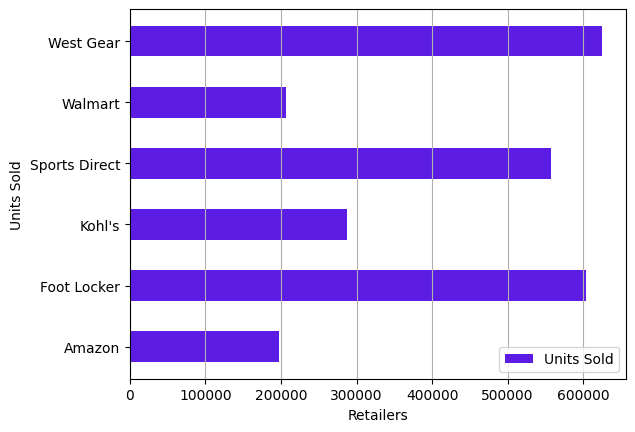

In [15]:
#Total Number of units sold and their Retailers
pt.grid(axis='x')
pt.xlabel("Retailers")
pt.ylabel("Units Sold")
pt.barh(retailer['Retailer'],retailer['Units Sold'],height=0.5,label='Units Sold',color="#5C1CE3")
pt.legend()
pt.show()

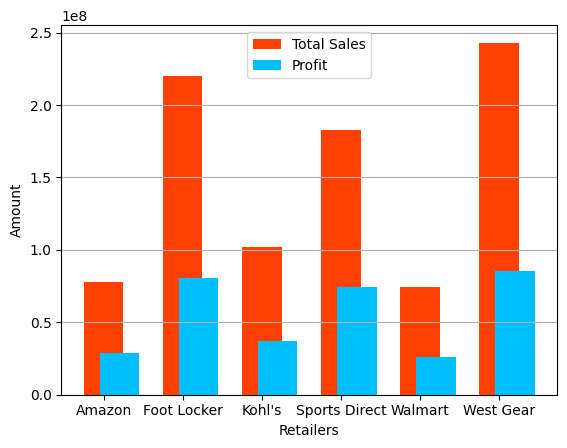

In [16]:
#Total sales and profit from each retailers
c=np.arange(len(retailer['Retailer']))
pt.xticks(c,retailer['Retailer'])
pt.xlabel("Retailers")
pt.ylabel("Amount")
pt.grid(axis='y')
pt.bar(c,retailer['Total Sales'],color='#ff4000',width=0.5,label='Total Sales')
pt.bar(c+0.2,retailer['Operating Profit'],color='#00BFFF',width=0.5,label="Profit")
pt.legend()
pt.show()

In [17]:
region=df.groupby('Region')[['Units Sold','Total Sales','Operating Profit']].sum().reset_index()
region

,Region,Units Sold,Total Sales,Operating Profit
0,Midwest,391337.0,135800459.0,52811412.0
1,Northeast,501279.0,186324067.0,68020688.0
2,South,492260.0,144663181.0,61138044.0
3,Southeast,407000.0,163171236.0,60555462.0
4,West,686985.0,269943182.0,89609516.0


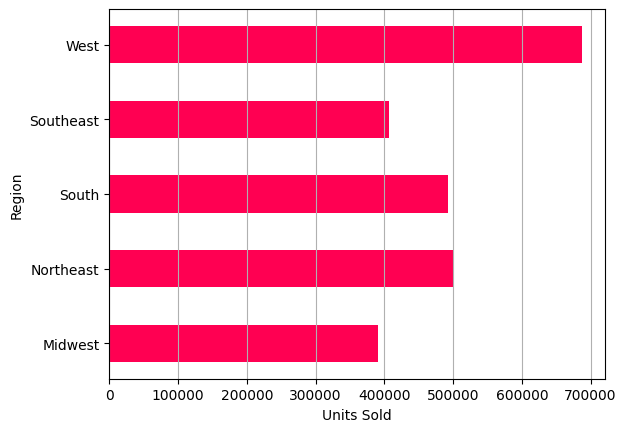

In [18]:
#Total units sold in each region
pt.barh(region['Region'],region['Units Sold'],height=0.5,color="#FF0052")
pt.xlabel('Units Sold')
pt.ylabel('Region')
pt.grid(axis='x')
pt.show()

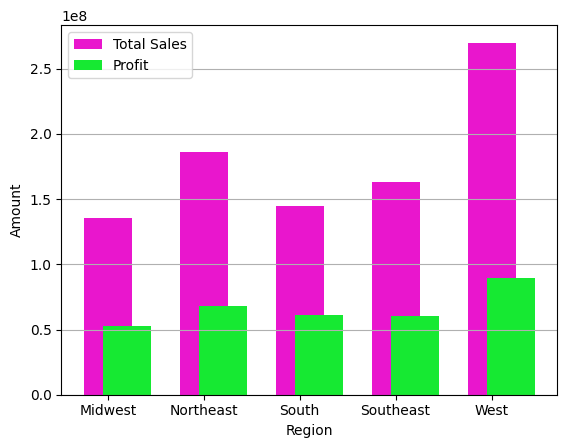

In [19]:
#total sales and operating profit in each region
c=np.arange(len(region['Region']))
pt.xticks(c,region['Region'])
pt.xlabel('Region')
pt.ylabel('Amount')
pt.bar(c,region['Total Sales'],label='Total Sales',width=0.5,color="#E916CD")
pt.bar(c+0.2,region['Operating Profit'],label='Profit',width=0.5,color="#16E932")
pt.legend()
pt.grid(axis='y')
pt.show()

In [20]:
year=df.groupby('Year')[['Units Sold','Total Sales','Operating Profit']].sum().reset_index()
year

,Year,Units Sold,Total Sales,Operating Profit
0,2020,462349.0,182080675.0,63375710.0
1,2021,2016512.0,717821450.0,268759412.0


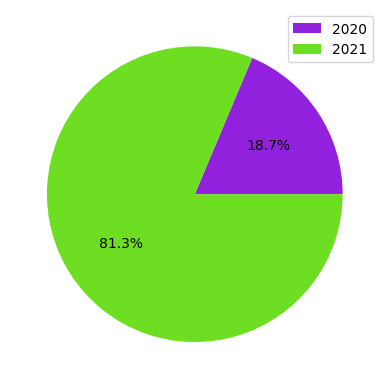

In [21]:
#Total Units sold in each year
pt.pie(year['Units Sold'],autopct='%0.1f%%',colors=['#9221DE','#6DDE21'])
pt.legend(year['Year'])
pt.show()

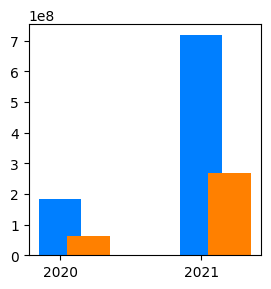

In [22]:
#Total Sales and Operating profit in each year
pt.figure(figsize=(3,3))
c=np.arange(len(year['Year']))
pt.xticks(c,year['Year'])
pt.bar(c,year['Total Sales'],width=0.3,color='#007FFF')
pt.bar(c+0.2,year['Operating Profit'],width=0.3,color='#FF8000')
pt.show()

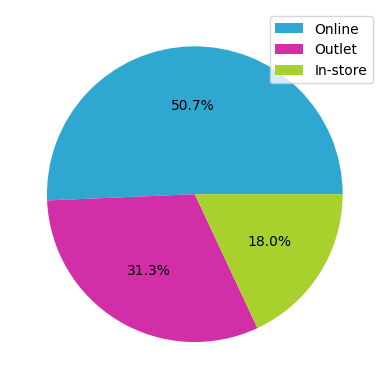

In [23]:
#Count of different sales methods
method=df['Sales Method'].value_counts().reset_index()
pt.pie(method['count'],autopct='%0.1f%%',colors=['#2EA8D1','#D12EA8','#A8D12E'])
pt.legend(method['Sales Method'])
pt.show()

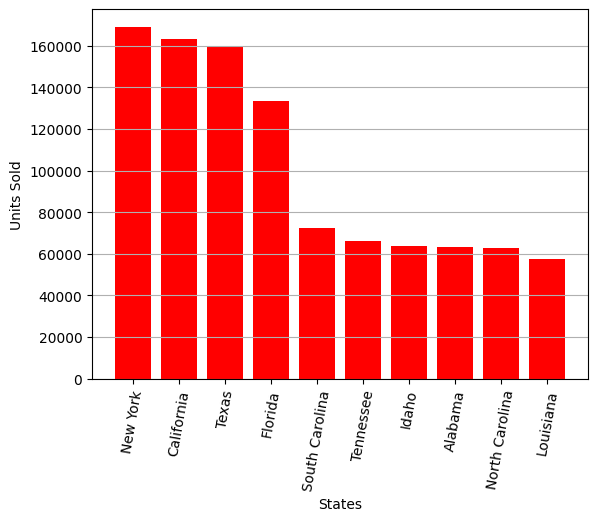

In [24]:
# Highest amount of Units sold of top 10 States
state=df.groupby('State')[['Units Sold','Total Sales','Operating Profit']].sum().reset_index()
top_state=state.nlargest(10,'Units Sold')
pt.bar(top_state['State'],top_state['Units Sold'],color='red')
pt.xticks(rotation=80)
pt.xlabel('States')
pt.ylabel('Units Sold')
pt.grid(axis='y')
pt.show()

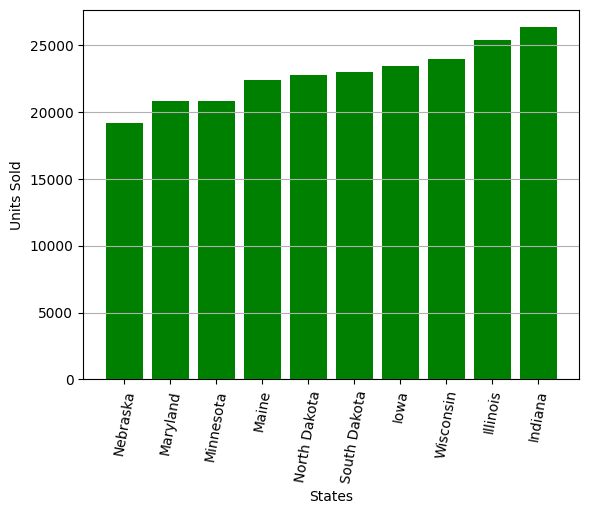

In [25]:
# Smallest amount of Units sold of top 10 States
top_state=state.nsmallest(10,'Units Sold')
pt.bar(top_state['State'],top_state['Units Sold'],color='green')
pt.xticks(rotation=80)
pt.xlabel('States')
pt.ylabel('Units Sold')
pt.grid(axis='y')
pt.show()

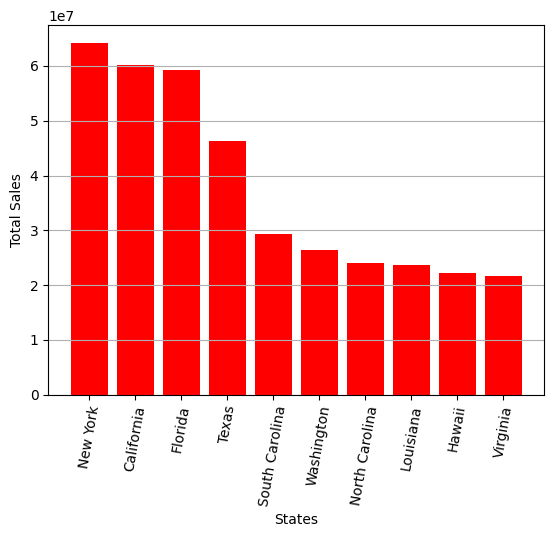

In [26]:
# Highest amount of Total Sales of top 10 States
top_state=state.nlargest(10,'Total Sales')
pt.bar(top_state['State'],top_state['Total Sales'],color='red')
pt.xticks(rotation=80)
pt.xlabel('States')
pt.ylabel('Total Sales')
pt.grid(axis='y')
pt.show()

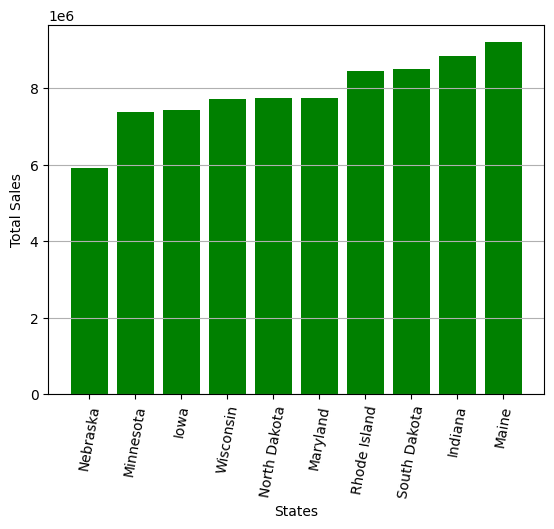

In [27]:
# Smallest amount of Total Sales of top 10 States
top_state=state.nsmallest(10,'Total Sales')
pt.bar(top_state['State'],top_state['Total Sales'],color='green')
pt.xticks(rotation=80)
pt.xlabel('States')
pt.ylabel('Total Sales')
pt.grid(axis='y')
pt.show()

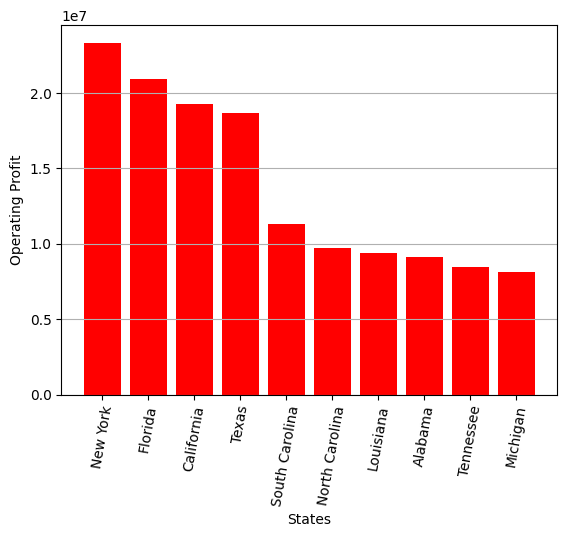

In [28]:
# Highest amount of Operating Profit of top 10 States
top_state=state.nlargest(10,'Operating Profit')
pt.bar(top_state['State'],top_state['Operating Profit'],color='red')
pt.xticks(rotation=80)
pt.xlabel('States')
pt.ylabel('Operating Profit')
pt.grid(axis='y')
pt.show()

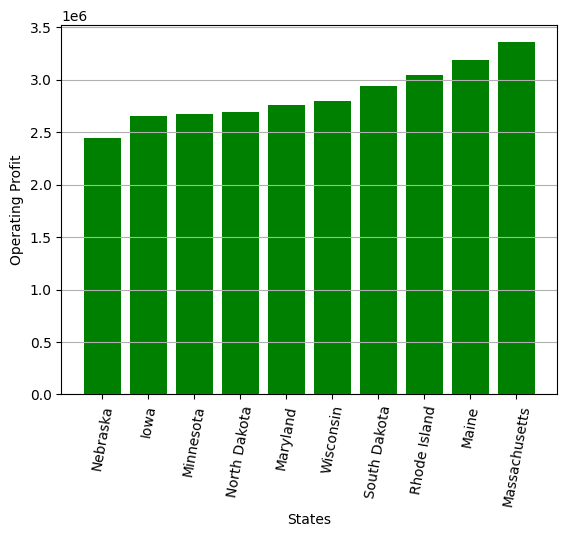

In [29]:
# Smallest amount of Operating Profit of top 10 States
top_state=state.nsmallest(10,'Operating Profit')
pt.bar(top_state['State'],top_state['Operating Profit'],color='green')
pt.xticks(rotation=80)
pt.xlabel('States')
pt.ylabel('Operating Profit')
pt.grid(axis='y')
pt.show()

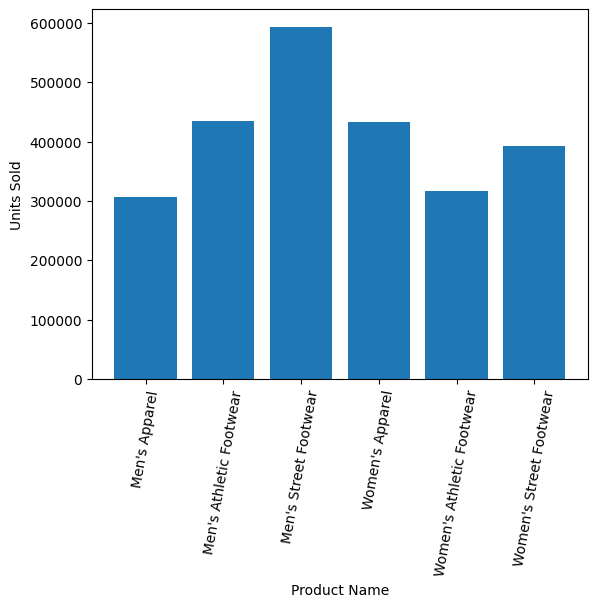

In [30]:
# Products and the total Units sold
product=df.groupby('Product')[['Units Sold']].sum().reset_index()
pt.bar(product['Product'],product['Units Sold'])
pt.xticks(rotation=80)
pt.xlabel('Product Name')
pt.ylabel('Units Sold')
pt.show()

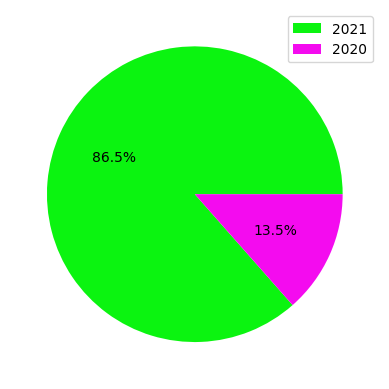

In [31]:
# Year having highest sales
sales=df['Year'].value_counts().reset_index()
pt.pie(sales['count'],autopct='%0.1f%%',colors=['#0BF410','#F40BEF'])
pt.legend(sales['Year'])
pt.show()

In [32]:
#adding gender for the product
def gender(x):
    if 'Men' in x:
        return 'Men'
    elif 'Women' in x:
        return 'Women'
df['Gender']=df['Product'].apply(gender)

In [33]:
gender=df.groupby('Gender')[['Units Sold','Total Sales','Operating Profit']].sum().reset_index()

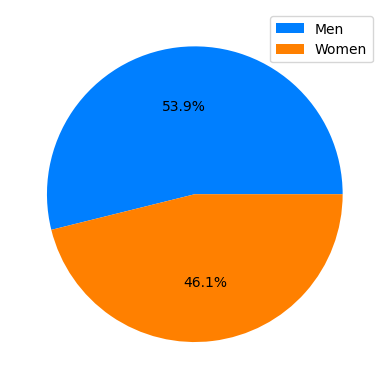

In [34]:
# the units sold based on the gender of the product
pt.pie(gender['Units Sold'],autopct='%0.1f%%',colors=['#007FFF','#FF8000'])
pt.legend(gender['Gender'])
pt.show()

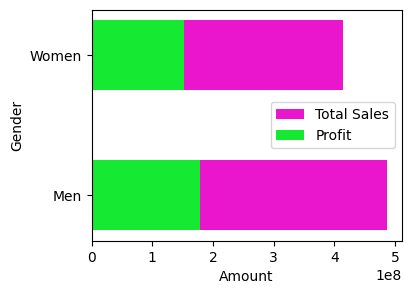

In [35]:
# Total sales and the operating price based on the gender of the product
pt.figure(figsize=(4,3))
c=np.arange(len(gender['Gender']))
pt.yticks(c,gender['Gender'])
pt.barh(c,gender['Total Sales'],height=0.5,label='Total Sales',color='#E916CD')
pt.barh(c,gender['Operating Profit'],height=0.5,label='Profit',color='#16E932')
pt.legend()
pt.xlabel('Amount')
pt.ylabel('Gender')
pt.show()

In [36]:
# adding column type of product
def type(x):
    if 'Footwear' in x:
        return 'Footwear'
    elif 'Apparel' in x:
        return 'Apparel'
df['Type']=df['Product'].apply(type)

In [37]:
type=df.groupby(['Type','Gender'])[['Units Sold','Total Sales','Operating Profit']].sum().reset_index()
apparel=type[type['Type']=='Apparel']
footwear=type[type['Type']=='Footwear']

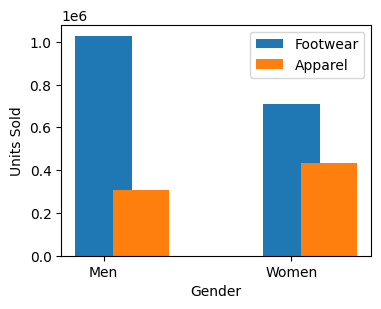

In [38]:
# total units of apparel and footwear sold based on gender
pt.figure(figsize=(4,3))
c=np.arange(len(apparel))
pt.xticks(c,apparel['Gender'])
pt.bar(c,footwear['Units Sold'],label='Footwear',width=0.3)
pt.bar(c+0.2,apparel['Units Sold'],label='Apparel',width=0.3)
pt.xlabel('Gender')
pt.ylabel('Units Sold')
pt.legend()
pt.show()

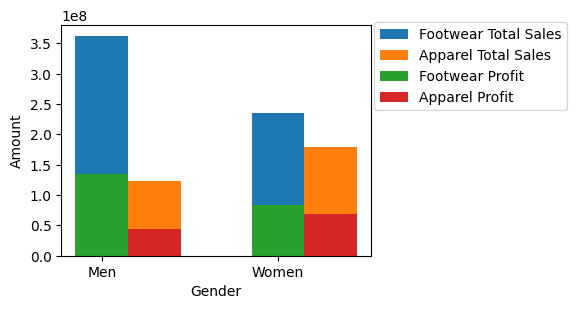

In [39]:
# total sales and profit of apparel and footwear based on gender
pt.figure(figsize=(4,3))
c=np.arange(len(apparel))
pt.xticks(c,apparel['Gender'])

pt.bar(c,footwear['Total Sales'],label='Footwear Total Sales',width=0.3)
pt.bar(c+0.3,apparel['Total Sales'],label='Apparel Total Sales',width=0.3)

pt.bar(c,footwear['Operating Profit'],label='Footwear Profit',width=0.3)
pt.bar(c+0.3,apparel['Operating Profit'],label='Apparel Profit',width=0.3)

pt.xlabel('Gender')
pt.ylabel('Amount')
pt.legend(loc=(1.01,0.63))
pt.show()

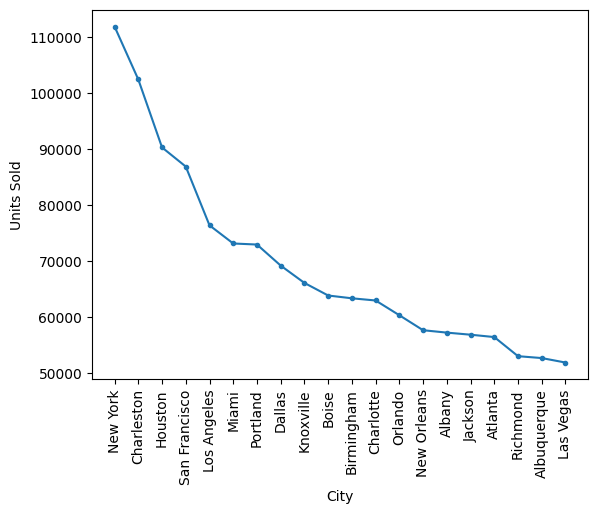

In [40]:
#Top 20 city with high Total units sold
item=df[['City','Units Sold']]
item=item.sort_values(by='Units Sold')
item=item.groupby('City')[['Units Sold']].sum().reset_index()
item=item.nlargest(20,'Units Sold')
pt.plot(item['City'],item['Units Sold'],marker='.')
pt.xticks(rotation=90)
pt.xlabel('City')
pt.ylabel('Units Sold')
pt.show()

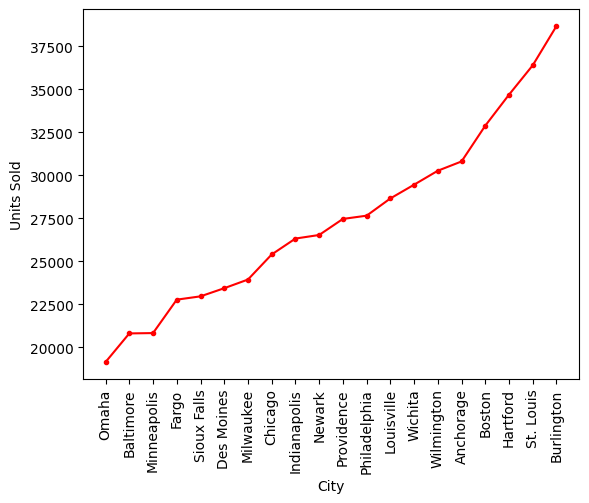

In [41]:
#Top 20 city with less Total units sold
item=df[['City','Units Sold']]
item=item.sort_values(by='Units Sold')
item=item.groupby('City')[['Units Sold']].sum().reset_index()
item=item.nsmallest(20,'Units Sold')
pt.plot(item['City'],item['Units Sold'],marker='.',color='red')
pt.xticks(rotation=90)
pt.xlabel('City')
pt.ylabel('Units Sold')
pt.show()

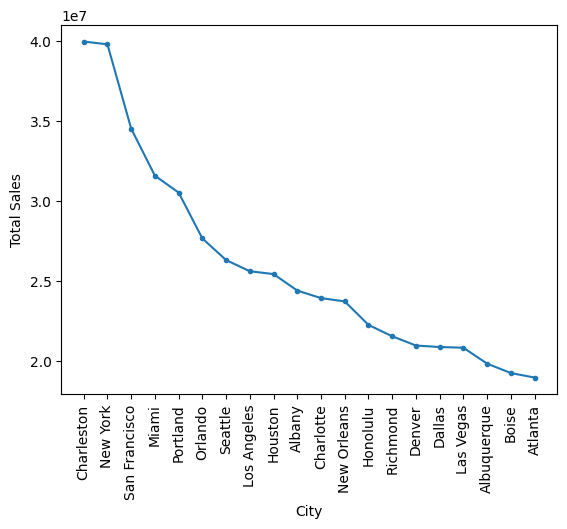

In [42]:
#Top 20 city with high Total sales
item=df[['City','Total Sales']]
item=item.sort_values(by='Total Sales')
item=item.groupby('City')[['Total Sales']].sum().reset_index()
item=item.nlargest(20,'Total Sales')
pt.plot(item['City'],item['Total Sales'],marker='.')
pt.xticks(rotation=90)
pt.xlabel('City')
pt.ylabel('Total Sales')
pt.show()

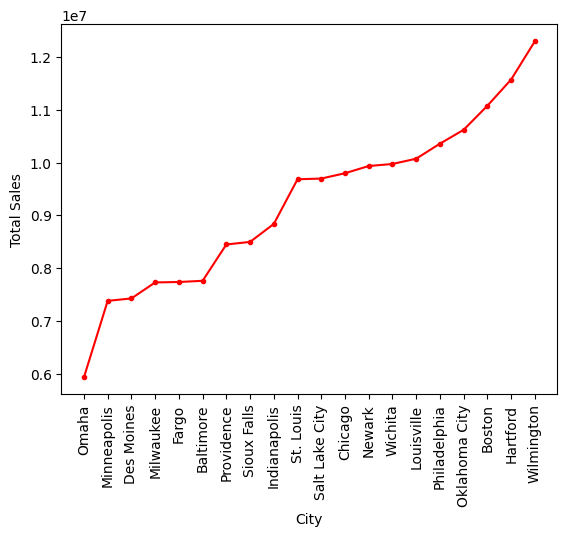

In [43]:
#Top 20 city with high Total sales
item=df[['City','Total Sales']]
item=item.sort_values(by='Total Sales')
item=item.groupby('City')[['Total Sales']].sum().reset_index()
item=item.nsmallest(20,'Total Sales')
pt.plot(item['City'],item['Total Sales'],marker='.',color='red')
pt.xticks(rotation=90)
pt.xlabel('City')
pt.ylabel('Total Sales')
pt.show()

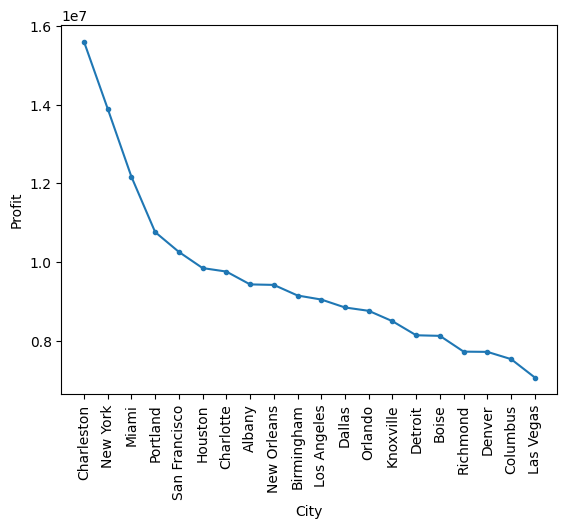

In [44]:
#Top 20 city with high operating profit
item=df[['City','Operating Profit']]
item=item.sort_values(by='Operating Profit')
item=item.groupby('City')[['Operating Profit']].sum().reset_index()
item=item.nlargest(20,'Operating Profit')
pt.plot(item['City'],item['Operating Profit'],marker='.')
pt.xticks(rotation=90)
pt.xlabel('City')
pt.ylabel('Profit')
pt.show()

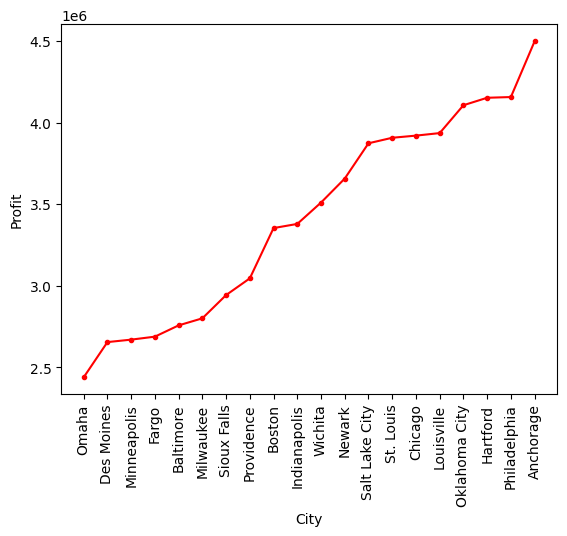

In [45]:
#Top 20 city with less operating profit
item=df[['City','Operating Profit']]
item=item.sort_values(by='Operating Profit')
item=item.groupby('City')[['Operating Profit']].sum().reset_index()
item=item.nsmallest(20,'Operating Profit')
pt.plot(item['City'],item['Operating Profit'],marker='.',color='red')
pt.xticks(rotation=90)
pt.xlabel('City')
pt.ylabel('Profit')
pt.show()

In [46]:
df

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Year,Gender,Type
0,Foot Locker,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,In-store,2020,Men,Footwear
1,Foot Locker,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,In-store,2020,Men,Footwear
2,Foot Locker,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,In-store,2020,Women,Footwear
3,Foot Locker,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,In-store,2020,Women,Footwear
4,Foot Locker,1/5/2020,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,In-store,2020,Men,Apparel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.0,Outlet,2021,Men,Apparel
9644,Foot Locker,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1378.0,Outlet,2021,Women,Apparel
9645,Foot Locker,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.0,Outlet,2021,Men,Footwear
9646,Foot Locker,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1235.0,Outlet,2021,Men,Footwear
